# Abstract
The objective of this project is to explore the different characteristics that can 

In [106]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style = "darkgrid")

In [107]:
##   Import Data set 
url = r'C:\Python_repository\PERSONAL\coder_house\Dating_app_behavior_coderhouse\dating_app_behavior_dataset.csv'
df = pd.read_csv(url)
df.head(10)

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome
0,Prefer Not to Say,Gay,Urban,High,Bachelor’s,"Fitness, Politics, Traveling",52,Moderate,0.60,Optimistic,173,23,4,44,75,0.36,13,Early Morning,Mutual Match
1,Male,Bisexual,Suburban,Upper-Middle,No Formal Education,"Languages, Fashion, Parenting",279,Extreme User,0.56,Optimistic,107,7,3,301,35,0.42,0,Morning,Chat Ignored
2,Non-binary,Pansexual,Suburban,Low,Master’s,"Movies, Reading, DIY",49,Moderate,0.41,Optimistic,91,27,2,309,33,0.41,1,After Midnight,Date Happened
3,Genderfluid,Gay,Metro,Very Low,Postdoc,"Coding, Podcasts, History",185,Extreme User,0.32,Balanced,147,6,5,35,5,0.07,21,Morning,No Action
4,Male,Bisexual,Urban,Middle,Bachelor’s,"Clubbing, Podcasts, Cars",83,High,0.32,Balanced,94,11,1,343,34,0.11,22,After Midnight,One-sided Like
5,Genderfluid,Lesbian,Small Town,High,Associate’s,"Anime, Clubbing, DIY",138,Addicted,0.62,Optimistic,163,22,4,112,87,0.18,10,Early Morning,Blocked
6,Male,Asexual,Metro,Lower-Middle,High School,"Tech, Makeup, Parenting",161,Addicted,0.38,Balanced,54,20,3,202,82,0.32,14,Morning,No Action
7,Female,Bisexual,Remote Area,Upper-Middle,Postdoc,"Spirituality, Sneaker Culture, Meditation",219,Extreme User,0.47,Optimistic,149,12,2,112,17,0.54,16,Evening,One-sided Like
8,Male,Gay,Suburban,High,Diploma,"MMA, Board Games, Startups",32,Moderate,0.23,Balanced,98,12,4,239,67,0.27,8,Late Night,Mutual Match
9,Prefer Not to Say,Gay,Remote Area,Upper-Middle,Bachelor’s,"Social Activism, Astrology, Photography",150,Addicted,0.68,Optimistic,111,5,3,1,92,0.27,23,Afternoon,Relationship Formed


In [108]:
df['sexual_orientation'].value_counts()

sexual_orientation
Straight      6326
Lesbian       6315
Demisexual    6301
Queer         6288
Asexual       6254
Pansexual     6237
Bisexual      6158
Gay           6121
Name: count, dtype: int64

In [109]:
# Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                50000 non-null  object 
 1   sexual_orientation    50000 non-null  object 
 2   location_type         50000 non-null  object 
 3   income_bracket        50000 non-null  object 
 4   education_level       50000 non-null  object 
 5   interest_tags         50000 non-null  object 
 6   app_usage_time_min    50000 non-null  int64  
 7   app_usage_time_label  50000 non-null  object 
 8   swipe_right_ratio     50000 non-null  float64
 9   swipe_right_label     50000 non-null  object 
 10  likes_received        50000 non-null  int64  
 11  mutual_matches        50000 non-null  int64  
 12  profile_pics_count    50000 non-null  int64  
 13  bio_length            50000 non-null  int64  
 14  message_sent_count    50000 non-null  int64  
 15  emoji_usage_rate   

In [110]:
# Check data distribution
df.describe().round(0)


,app_usage_time_min,swipe_right_ratio,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0
mean,150.0,1.0,100.0,14.0,3.0,250.0,50.0,0.0,12.0
std,87.0,0.0,58.0,9.0,2.0,145.0,29.0,0.0,7.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,74.0,0.0,49.0,6.0,1.0,125.0,25.0,0.0,5.0
50%,150.0,0.0,100.0,13.0,3.0,250.0,50.0,0.0,12.0
75%,225.0,1.0,150.0,22.0,5.0,376.0,75.0,0.0,18.0
max,300.0,1.0,200.0,30.0,6.0,500.0,100.0,1.0,23.0


In [111]:
# Ceck null values
pd.isnull(df).sum()



gender                  0
sexual_orientation      0
location_type           0
income_bracket          0
education_level         0
interest_tags           0
app_usage_time_min      0
app_usage_time_label    0
swipe_right_ratio       0
swipe_right_label       0
likes_received          0
mutual_matches          0
profile_pics_count      0
bio_length              0
message_sent_count      0
emoji_usage_rate        0
last_active_hour        0
swipe_time_of_day       0
match_outcome           0
dtype: int64

In [112]:
## High education level heteroxesual women do not have a cherry-picking behaviour (swipe_right_ratio)

In [113]:
df['education_level'].unique()

array(['Bachelor’s', 'No Formal Education', 'Master’s', 'Postdoc',
       'Associate’s', 'High School', 'Diploma', 'PhD', 'MBA'],
      dtype=object)

In [114]:
# Add column with education level in numeric format
df['education_level_numeric'] = df['education_level'].map({'Bachelor’s':4, 'No Formal Education':0, 'Master’s':5, 'Postdoc':8,
       'Associate’s':2, 'High School':1, 'Diploma':3, 'PhD':7, 'MBA':6}).astype(int)

df.groupby('education_level').agg(
    {'education_level_numeric': 'max'}
)

,education_level_numeric
education_level,
Associate’s,2
Bachelor’s,4
Diploma,3
High School,1
MBA,6
Master’s,5
No Formal Education,0
PhD,7
Postdoc,8


In [115]:
# Filter by gender and sexual_orientation
df.loc[(df['gender'] == 'Female') & (df['sexual_orientation'] == 'Straight') &(df['education_level_numeric'] >= 5)].head()


,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome,education_level_numeric
246,Female,Straight,Metro,Very High,Master’s,"Skating, Painting, Gardening",176,Addicted,0.56,Optimistic,144,16,2,198,34,0.45,5,Early Morning,Instant Match,5
380,Female,Straight,Urban,Upper-Middle,PhD,"Motorcycling, Startups, Yoga",190,Extreme User,0.47,Optimistic,197,2,1,80,63,0.32,2,After Midnight,Catfished,7
396,Female,Straight,Remote Area,Very High,MBA,"Gaming, Memes, Stand-up Comedy",21,Low,0.82,Swipe Maniac,81,17,4,76,41,0.50,16,After Midnight,Blocked,6
397,Female,Straight,Remote Area,High,MBA,"Running, Crafting, Startups",294,Extreme User,0.06,Choosy,129,2,1,221,37,0.33,12,Morning,Ghosted,6
541,Female,Straight,Remote Area,High,Postdoc,"Pets, Makeup, Gardening",109,High,0.85,Swipe Maniac,169,30,6,380,59,0.14,8,After Midnight,Relationship Formed,8


In [116]:
# Add a new column 'category' based on the conditions 
df['fem_cat'] = np.where(
    (df['gender'] == 'Female') & (df['sexual_orientation'] == 'Straight') & (df['education_level_numeric'] >= 5),
    'female_top',
    'female_low'
)
df_fem = df[(df['gender'] == 'Female')  & (df['sexual_orientation'] == 'Straight')]
df_fem.head(10)

,gender,sexual_orientation,location_type,income_bracket,education_level,interest_tags,app_usage_time_min,app_usage_time_label,swipe_right_ratio,swipe_right_label,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,swipe_time_of_day,match_outcome,education_level_numeric,fem_cat
20,Female,Straight,Small Town,Very Low,Diploma,"Cooking, Startups, MMA",120,Addicted,0.68,Optimistic,103,3,4,126,74,0.20,19,Early Morning,Catfished,3,female_low
157,Female,Straight,Suburban,Middle,Diploma,"Dancing, Binge-Watching, Gardening",95,High,0.49,Optimistic,191,30,6,474,37,0.21,1,Early Morning,No Action,3,female_low
232,Female,Straight,Urban,Very High,No Formal Education,"Fitness, Dancing, Skating",186,Extreme User,0.73,Swipe Maniac,98,29,1,91,4,0.05,17,After Midnight,Chat Ignored,0,female_low
246,Female,Straight,Metro,Very High,Master’s,"Skating, Painting, Gardening",176,Addicted,0.56,Optimistic,144,16,2,198,34,0.45,5,Early Morning,Instant Match,5,female_top
380,Female,Straight,Urban,Upper-Middle,PhD,"Motorcycling, Startups, Yoga",190,Extreme User,0.47,Optimistic,197,2,1,80,63,0.32,2,After Midnight,Catfished,7,female_top
396,Female,Straight,Remote Area,Very High,MBA,"Gaming, Memes, Stand-up Comedy",21,Low,0.82,Swipe Maniac,81,17,4,76,41,0.50,16,After Midnight,Blocked,6,female_top
397,Female,Straight,Remote Area,High,MBA,"Running, Crafting, Startups",294,Extreme User,0.06,Choosy,129,2,1,221,37,0.33,12,Morning,Ghosted,6,female_top
464,Female,Straight,Urban,Upper-Middle,High School,"Gaming, Startups, K-pop",111,High,0.21,Balanced,153,20,0,362,15,0.59,2,Late Night,Ghosted,1,female_low
541,Female,Straight,Remote Area,High,Postdoc,"Pets, Makeup, Gardening",109,High,0.85,Swipe Maniac,169,30,6,380,59,0.14,8,After Midnight,Relationship Formed,8,female_top
544,Female,Straight,Suburban,Very High,Bachelor’s,"Clubbing, Gardening, Languages",223,Extreme User,0.33,Balanced,108,20,0,103,20,0.02,8,Morning,Mutual Match,4,female_low


In [117]:

# Select only numeric columns for aggregation
numeric_columns = df.select_dtypes(include=['number'])

# Pivot the table to change categories to columns and data to rows
df_pivot = numeric_columns.groupby(df['fem_cat']).mean().transpose()
df_pivot


fem_cat,female_low,female_top
app_usage_time_min,149.940524,147.133733
swipe_right_ratio,0.500682,0.498024
likes_received,99.529041,99.229541
mutual_matches,13.867937,14.101796
profile_pics_count,2.988121,2.948104
bio_length,250.149256,252.658683
message_sent_count,50.062830,50.972056
emoji_usage_rate,0.286300,0.276866
last_active_hour,11.523485,11.355289
education_level_numeric,3.971111,6.522954


C:\Users\AlvaroCancino\AppData\Local\Temp\ipykernel_23260\631524893.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='education_level', y='swipe_right_ratio', data=average_swipe_right_ratio, palette='Blues_d')
C:\Users\AlvaroCancino\AppData\Local\Temp\ipykernel_23260\631524893.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='education_level', y='swipe_right_ratio', data=df_fem.sort_values('education_level_numeric', ascending=True), palette='Blues_d')


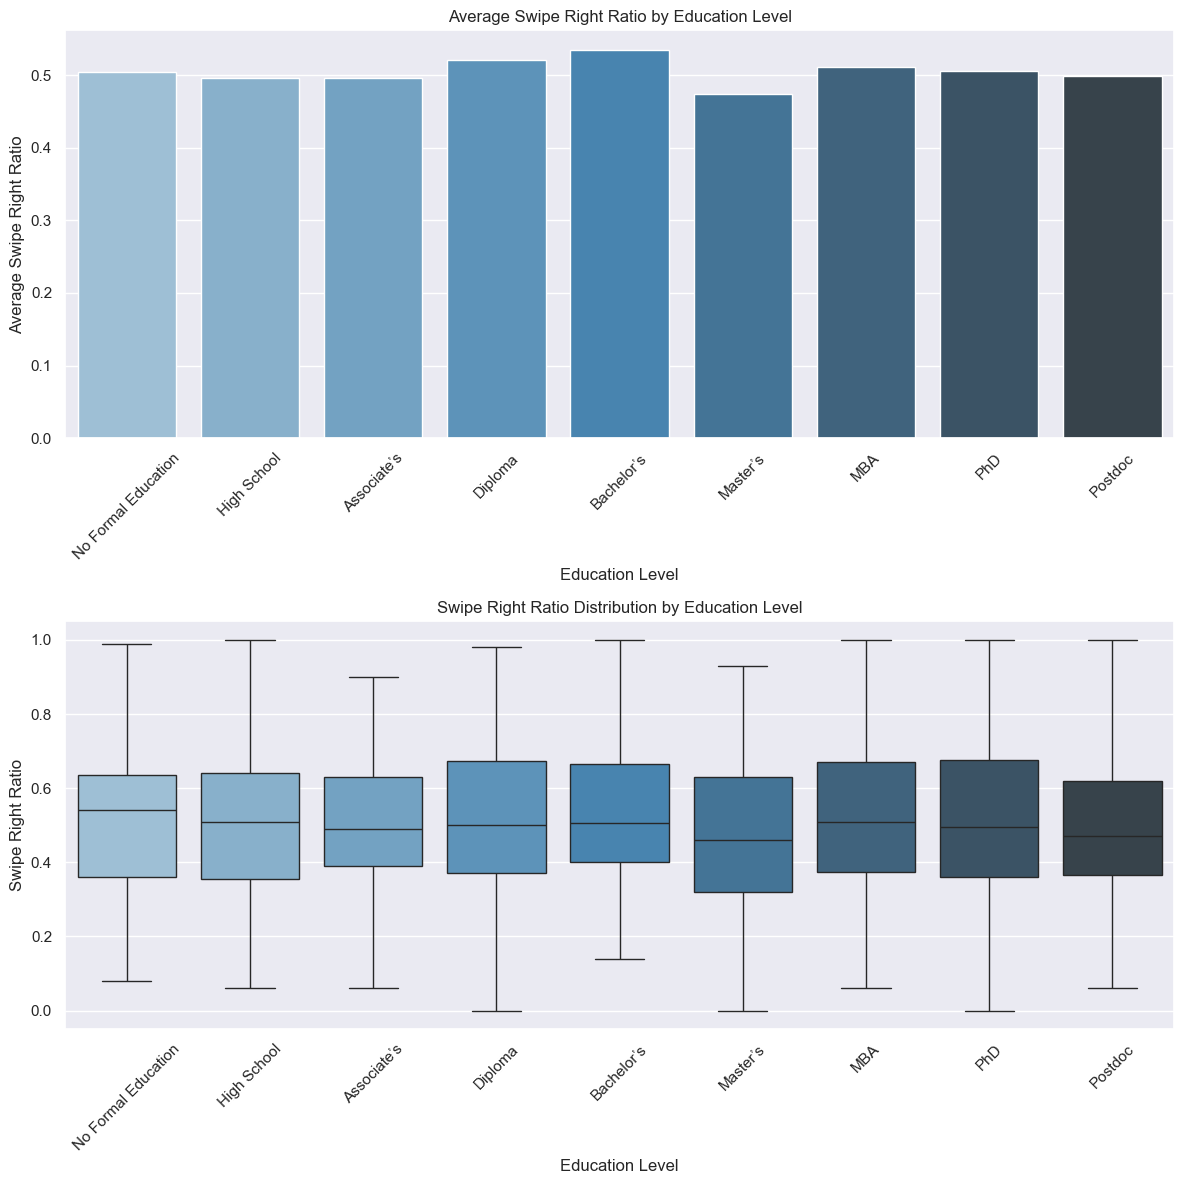

In [118]:
# Chart women swipe rations based on education level
import matplotlib.pyplot as plt
import seaborn as sns   

#Calculate the average swipe right ratio for each education level
average_swipe_right_ratio = df_fem.groupby(['education_level', 'education_level_numeric'])['swipe_right_ratio'].mean().reset_index().sort_values('education_level_numeric', ascending=True)


# Create a unique panel for the two charts
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Barplot for average swipe right ratio by education level
sns.barplot(ax=axes[0], x='education_level', y='swipe_right_ratio', data=average_swipe_right_ratio, palette='Blues_d')
axes[0].set_title('Average Swipe Right Ratio by Education Level')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Average Swipe Right Ratio')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for swipe right ratio distribution by education level
sns.boxplot(ax=axes[1], x='education_level', y='swipe_right_ratio', data=df_fem.sort_values('education_level_numeric', ascending=True), palette='Blues_d')
axes[1].set_title('Swipe Right Ratio Distribution by Education Level')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Swipe Right Ratio')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
